# Understanding Over & Underfitting
## Predicting Boston Housing Prices

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn #install the library directly in anaconda (conda install -c conda-forge imbalanced-learn)

# Import libraries from sklearn package

from sklearn.model_selection import train_test_split

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [3]:
boston_house = pd.read_csv('/Users/GiadaSartori/Documents/IRONHACK/Lab/Week7/lab-problems-in-ml/data/boston_data.csv')
boston_house.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

In [4]:
boston_house.dtypes

crim       float64
zn         float64
indus      float64
chas       float64
nox        float64
rm         float64
age        float64
dis        float64
rad        float64
tax        float64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [11]:
boston_house.shape

(404, 14)

In [12]:
boston_house.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [10]:
# Check which are the unique values of our target, label for prediction

boston_house['medv'].unique()

array([21.7, 19.6, 20.3, 15.4, 20.5, 34.9, 26.2, 21.6, 14.1, 17. , 10.4,
       23.3, 21. , 22.2,  8.7, 23.7, 12. , 21.5,  9.5, 23. , 20.8, 29.4,
       16.5, 16.2, 18.4, 31.1, 21.9, 18.6, 29.1, 36.2, 17.8,  5. , 23.1,
       50. , 29. , 12.7, 35.1, 19.9, 13.8, 23.9, 20.2, 22.6, 19.4, 15.6,
       43.1, 13.4, 13.1, 11.3, 31. , 42.3, 44.8, 25. , 35.2, 24. , 18.2,
       10.2,  7.2, 28.2, 22.9, 34.7, 22. , 22.4, 17.1, 24.1, 19.8, 33.4,
        8.5, 23.2, 16.8, 20.6, 16.4, 43.5, 20. , 13.5, 18.5, 23.4, 35.4,
       19.3, 12.6, 26.6, 32.9, 39.8, 29.6, 30.1, 14. , 24.5, 32.7, 41.3,
       28.7, 19. , 34.6, 20.1, 23.8, 15.1, 16.1, 21.8, 13.9, 30.8, 11.8,
       28.4, 18.9, 21.4, 26.4, 37.2, 24.8, 14.5, 12.3, 17.2, 10.5,  7. ,
       24.7, 37.9, 19.1, 24.4, 37.6, 29.8, 12.1, 27.5,  8.8,  8.4, 22.7,
       11.9, 21.1, 15.2, 18.7, 26.5, 11.5, 30.3, 18.8, 28.6, 27. , 33.1,
       26.7, 13.3,  9.7, 36.5, 33.3, 24.6, 11.7, 13. , 15.3,  8.1, 16.7,
       23.6, 32. , 17.3, 15. , 33.2, 20.9, 21.2, 22

In [8]:
# Assign column/s to features and labels

features = boston_house.drop(columns=['medv'])
labels = boston_house['medv']

print(features.head())
print(labels.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad    tax  \
0  0.15876   0.0  10.81   0.0  0.413  5.961  17.5  5.2873  4.0  305.0   
1  0.10328  25.0   5.13   0.0  0.453  5.927  47.2  6.9320  8.0  284.0   
2  0.34940   0.0   9.90   0.0  0.544  5.972  76.7  3.1025  4.0  304.0   
3  2.73397   0.0  19.58   0.0  0.871  5.597  94.9  1.5257  5.0  403.0   
4  0.04337  21.0   5.64   0.0  0.439  6.115  63.0  6.8147  4.0  243.0   

   ptratio   black  lstat  
0     19.2  376.94   9.88  
1     19.7  396.90   9.22  
2     18.4  396.24   9.97  
3     14.7  351.85  21.45  
4     16.8  393.97   9.43  
0    21.7
1    19.6
2    20.3
3    15.4
4    20.5
Name: medv, dtype: float64


### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [13]:
boston_house.head(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6


In [25]:
boston_house[['crim', 'rm', 'age', 'dis', 'tax', 'ptratio', 'lstat', 'medv']].corr()

,crim,rm,age,dis,tax,ptratio,lstat,medv
crim,1.000000,-0.172226,0.349288,-0.376493,0.565047,0.292092,0.428940,-0.400956
rm,-0.172226,1.000000,-0.210589,0.178700,-0.241733,-0.323330,-0.578025,0.683541
age,0.349288,-0.210589,1.000000,-0.734915,0.503830,0.231820,0.602001,-0.390863
dis,-0.376493,0.178700,-0.734915,1.000000,-0.526938,-0.206016,-0.500912,0.264876
tax,0.565047,-0.241733,0.503830,-0.526938,1.000000,0.465997,0.542732,-0.495792
ptratio,0.292092,-0.323330,0.231820,-0.206016,0.465997,1.000000,0.351408,-0.506313
lstat,0.428940,-0.578025,0.602001,-0.500912,0.542732,0.351408,1.000000,-0.742695
medv,-0.400956,0.683541,-0.390863,0.264876,-0.495792,-0.506313,-0.742695,1.000000


#### Comments from Giada

- CRIM negative correlated
- RM positive correlated
- AGE negative correlated
- DIS positive correlated
- TAX negative correlated
- pratio negative correlated
- Istat negative correlated

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

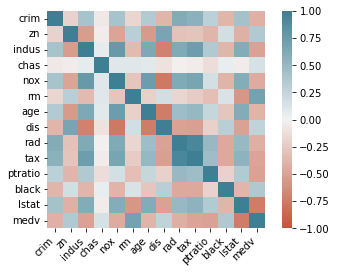

In [19]:
#1. First heatmap

corr = boston_house.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

plt.show()

/var/folders/vy/72w35wd12ms4_h7n214795k40000gn/T/ipykernel_23749/673952724.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


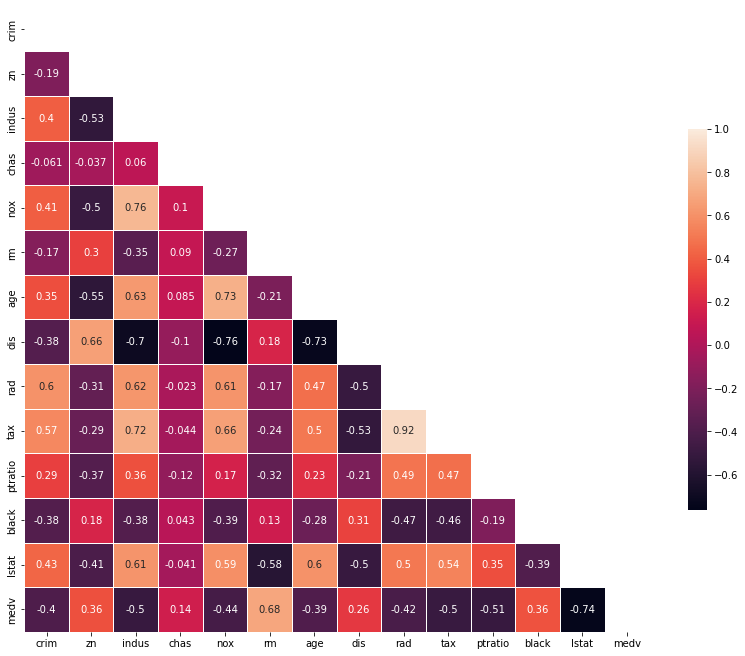

In [29]:
#2. Second heatmap

boston_data = pd.concat([features, labels], axis=1)

corr = boston_data.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(14, 14))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [30]:
boston_house.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [31]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:

    return r2_score(y_true, y_predict)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

#### Steps:
1. Do the train-test split, with a default test size of 25% (since it is not specified)
2. Choose a model, and create an empty model to train
3. Evaluate the model with score, then do it with prediction (just in case)

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
# Five separate RFR here with the given max depths

forest_2 = RandomForestRegressor(max_depth=2)
forest_4 = RandomForestRegressor(max_depth=4)
forest_6 = RandomForestRegressor(max_depth=6)
forest_8 = RandomForestRegressor(max_depth=8)
forest_10 = RandomForestRegressor(max_depth=10)

forest_2.fit(X_train, y_train)
forest_4.fit(X_train, y_train)
forest_6.fit(X_train, y_train)
forest_8.fit(X_train, y_train)
forest_10.fit(X_train, y_train)

RandomForestRegressor(max_depth=10)

Now, plot the score for each tree on the training set and on the testing set.

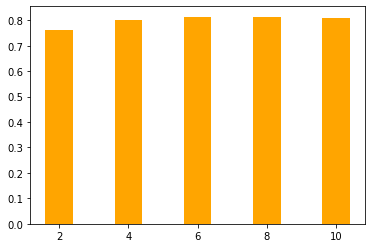

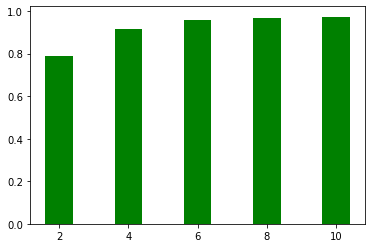

In [55]:
# Produce a plot with the score for the testing and training for the different max depths

#plt.bar(x, height = h, color = c)

test_score = [forest_2.score(X_test, y_test), forest_4.score(X_test, y_test), forest_6.score(X_test, y_test), forest_8.score(X_test, y_test), forest_10.score(X_test, y_test)]
train_score = [forest_2.score(X_train, y_train), forest_4.score(X_train, y_train), forest_6.score(X_train, y_train), forest_8.score(X_train, y_train), forest_10.score(X_train, y_train)]

depth = [2,4,6,8,10] # --> x

color_test_score = 'orange'
color_train_score = 'green'

plt.bar(depth, test_score, color = color_test_score)
plt.show()

plt.bar(depth, train_score, color = color_train_score)
plt.show()


What do these results tell you about the effect of the depth of the trees on the performance of the model?

# Comments from Giada:

We see that the bigger the depth of the training set, the more accurate and better the accuracy of the model


### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? Check out this article before answering: https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

In [ ]:
# Your response here

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

Max_depth indicates how deep the tree can be. The deeper the tree, the more splits it has and it captures more information about the data.

In [ ]:
# Your response here

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

### Comments

- The data from 1978 is not quite meaningful for a prediction since it is too long backdated. It is rather useful to compare how prices have changed compared to today's average price
- The data should have been updated and considered prices dating back to 2010 at least. , only for a comparison to todays prices
- Also the indicators included in the dataset for prediction of the current average price of houses should be modernized:
    - removal of black for discriminatory reasons
    - number of schools around the area is relevant
    - distance to the companies employing the most amount of inhabitants can be interesting 